<a href="https://colab.research.google.com/github/QwerA10/Study/blob/main/%EA%B8%B0%EC%83%81%EC%A1%B0%EA%B1%B4%EC%97%90_%EB%94%B0%EB%A5%B8_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EB%B0%9C%EC%83%9D%EB%A5%A0_%EB%B6%84%EC%84%9D(%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,380 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/서울시교통사고.csv')
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100064,2020년 1월 1일 05시,수요일,서울특별시 강남구 도곡동,사망사고,1,0,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,63세,상해없음,보행자,여,29세,사망
1,2020010400100076,2020년 1월 4일 06시,토요일,서울특별시 동대문구 장안동,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,남,64세,상해없음,보행자,남,27세,사망
2,2020010600100145,2020년 1월 6일 10시,월요일,서울특별시 강서구 방화동,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,화물,남,47세,상해없음,보행자,남,75세,사망
3,2020010700100707,2020년 1월 7일 22시,화요일,서울특별시 서초구 방배동,사망사고,1,0,0,0,차대사람 - 차도통행중,...,비,단일로 - 기타,승용,남,62세,상해없음,보행자,남,72세,사망
4,2020011000100042,2020년 1월 10일 04시,금요일,서울특별시 강남구 수서동,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,화물,남,35세,상해없음,보행자,여,84세,사망


In [2]:
df_filter = df.filter(['사고일시', '시군구', '사망자수', '중상자수', '경상자수', '부상신고자수', '기상상태'])
df_filter.head()

,사고일시,시군구,사망자수,중상자수,경상자수,부상신고자수,기상상태
0,2020년 1월 1일 05시,서울특별시 강남구 도곡동,1,0,0,0,맑음
1,2020년 1월 4일 06시,서울특별시 동대문구 장안동,1,0,0,0,맑음
2,2020년 1월 6일 10시,서울특별시 강서구 방화동,1,0,0,0,맑음
3,2020년 1월 7일 22시,서울특별시 서초구 방배동,1,0,0,0,비
4,2020년 1월 10일 04시,서울특별시 강남구 수서동,1,0,0,0,맑음


In [3]:
weather_conditions = df_filter['기상상태'].unique()
print(weather_conditions)

['맑음' '비' '흐림' '기타' '눈']


In [4]:
districts = df_filter['시군구'].unique()
districts_list = [address.split()[1] for address in districts]

unique_districts = list(set(districts_list))
print(unique_districts)

['동대문구', '양천구', '구로구', '은평구', '도봉구', '영등포구', '동작구', '마포구', '용산구', '노원구', '광진구', '서대문구', '중랑구', '강동구', '관악구', '중구', '강남구', '금천구', '성동구', '송파구', '성북구', '강서구', '종로구', '강북구', '서초구']


In [5]:
#서울시 년도별 기상조건에 따른 교통사고 발생건수
from datetime import datetime

date_format = "%Y년"

def parse_datetime(date_string):
  date_string = date_string.split()[0]
  return datetime.strptime(date_string, date_format)

df_filter['년도'] = df_filter['사고일시'].apply(parse_datetime).dt.year
df_sunny = df_filter[df_filter['기상상태'] == '맑음']
sunny_counts = df_sunny['년도'].value_counts().sort_index()

df_rain = df_filter[df_filter['기상상태'] == '비']
rain_counts = df_rain['년도'].value_counts().sort_index()

df_cloudy = df_filter[df_filter['기상상태'] == '흐림']
cloudy_counts = df_cloudy['년도'].value_counts().sort_index()

df_snow = df_filter[df_filter['기상상태'] == '눈']
snow_counts = df_snow['년도'].value_counts().sort_index()

df_etc = df_filter[df_filter['기상상태'] == '기타']
etc_counts = df_etc['년도'].value_counts().sort_index()

data = {'맑음': sunny_counts, '비': rain_counts, '흐림': cloudy_counts, '눈': snow_counts, '기타': etc_counts}
weather_df = pd.DataFrame(data)
weather_df['눈'] = weather_df['눈'].fillna(0).astype(int)
print(weather_df)

       맑음   비  흐림  눈  기타
년도                      
2020  182  18  14  0   4
2021  197  21  18  1   1
2022  176  19  16  2   2


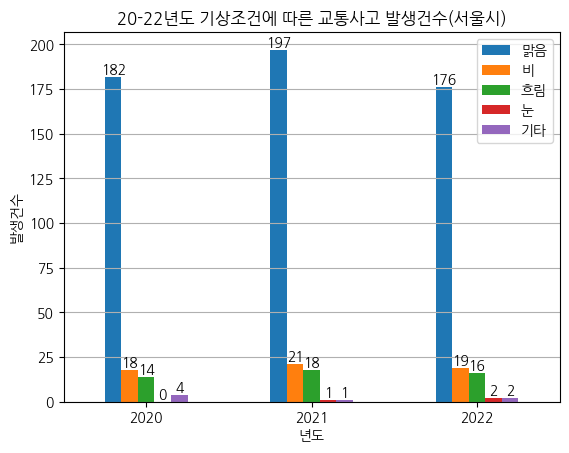

In [6]:
#서울시 년도별 기상조건에 따른 교통사고 발생건수 시각화
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'NanumGothic')

ax = weather_df.plot(kind='bar')
plt.title('20-22년도 기상조건에 따른 교통사고 발생건수(서울시)')
plt.xlabel('년도')
plt.ylabel('발생건수')
plt.xticks(rotation=0)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', (rect.get_x() + rect.get_width() / 2.0, height), ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

In [7]:
#서울시 사고 발생 현황
accidents_by_district = df_filter.groupby('시군구').agg({
    '사망자수': 'sum',
    '중상자수': 'sum',
    '경상자수': 'sum',
    '부상신고자수': 'sum'
}).reset_index()

total_fatalities = accidents_by_district['사망자수'].sum()
total_serious_injuries = accidents_by_district['중상자수'].sum()
total_minor_injuries = accidents_by_district['경상자수'].sum()
total_injuries = accidents_by_district['부상신고자수'].sum()

print(f'전체 사망자수: {total_fatalities}')
print(f'전체 중상자수: {total_serious_injuries}')
print(f'전체 경상자수: {total_minor_injuries}')
print(f'전체 부상신고자수: {total_injuries}')

전체 사망자수: 683
전체 중상자수: 66
전체 경상자수: 149
전체 부상신고자수: 12


In [24]:
#사고 발생 현황
all_districts = unique_districts

def calculate_accidents_by_all_districts():
    all_districts_accidents = df_filter.groupby('시군구').agg({
        '사망자수': 'sum',
        '중상자수': 'sum',
        '경상자수': 'sum',
        '부상신고자수': 'sum'
    }).reset_index()

    return all_districts_accidents

all_districts_accidents = calculate_accidents_by_all_districts()

all_districts_accidents.head()

,시군구,사망자수,중상자수,경상자수,부상신고자수
0,서울특별시 강남구 개포동,2,0,0,0
1,서울특별시 강남구 논현동,3,1,1,0
2,서울특별시 강남구 대치동,4,1,1,0
3,서울특별시 강남구 도곡동,3,1,0,0
4,서울특별시 강남구 삼성동,3,0,2,0
